# Notebook desenvolvido para exemplificar 5 testes que serão importantes para discutir os resultados obtidos via correlação cruzada para calcular a direção de magnetização de fontes magnéticas 3D. Os testes são:

* Teste 0 - Corpo alongado
    * Direção X
    * Direção Y
* Teste 1 - Corpo rotacionado
    * Utilização da camada equivalente dentro dos pontos originais de grid
    * Utilização da camada equivalente dentro dos pontos rotacionados
* Teste 2 - Corpo alongado na direção vertical
* Teste 3 - Corpo magnetizados internos entre si
    * Corpo intrusivo: mesma direção incladada do corpo encaixante
    * Corpo intrusivo: direção diferente da rocha enxaixante
* Teste 4 - Corpo com mergulho de $30^o$ N-S
* Teste 5 - Corpos cruzados

In [1]:
# Importando as bibliotecas
import numpy
from time import time
from matplotlib import pyplot
from codes.prism import prism_tf
from codes.grids import regular_grid
from codes.plot import draw_prism
from codes.statistical import analysis
from codes.auxiliars import addnoise, rotate3D_xyz

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [3]:
# Importa os filtros e camada equivalente
from codes.statistical import cccoef
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv
from codes.equivalentlayer import layer, fit_layer, rtp_layer

In [200]:
%matplotlib inline

In [4]:
# Numero de pontos e shape do dado
nx, ny = 40, 40
area = (-4000., 4000., -4000., 4000.)
shape = (nx, ny)
xo, yo, zo = regular_grid(area, shape, -100.)

In [142]:
# Direções
inc, dec, incs, decs = -36., -21., 0., 0.

### Teste 0A - Dique alongado em $W-E$

In [5]:
# Define modelo e direcoes
dike0a = [-300., 300., -2000., 2000., 0., 1000., 1.75]

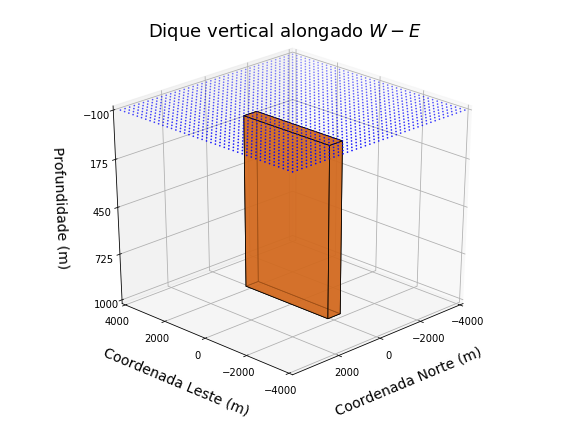

In [6]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical alongado $W-E$', size = 18)

ax.scatter(xo, yo, zo, s = 0.5, c = 'b')
# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike0a[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
pc0a = Poly3DCollection(vertices, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
pc0a.set_facecolor('chocolate')
ax.add_collection3d(pc0a)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(zo.min(), z2, 5))
# Angulo de visualizacao
ax.view_init(210, 135)
pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme00a-modelo3D.png', dpi = 300, bbox_inches = 'tight', transparence = True)
pyplot.show()

In [8]:
# Calcula a anomalia de campo total
tf0a = prism_tf(xo, yo, zo, dike0a, inc, dec, incs, decs)

In [9]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf0a, 'nT')

Anomalia magnetica:
Minimum:    -603.7388 nT
Maximum:    280.9544 nT
Mean value: -2.9852 nT
Variation:  884.6932 nT


In [10]:
# Adicao de ruido
tf0a = addnoise(tf0a, 5., 0.05)

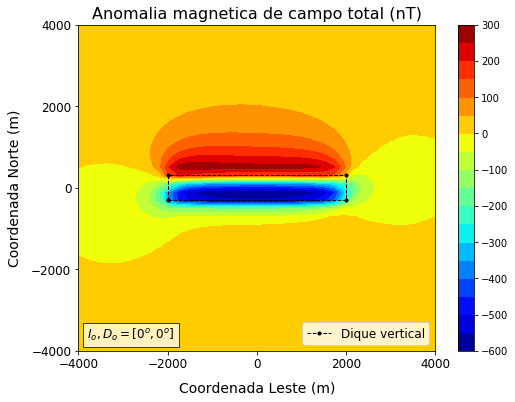

In [11]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf0a.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike0a[0:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'lower right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme00a-anomaly.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [12]:
# Cria os grids de inclinacao
inclination = numpy.linspace(-90., 90., 37)
declination = numpy.linspace(-90., 90., 31)
D0, I0 = numpy.meshgrid(declination, inclination)

In [13]:
# Cria a matriz de zeros
res0a = numpy.zeros_like(D0)

In [14]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob0a = tf0a.reshape(shape)

In [15]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 600.

In [16]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [17]:
# Aloca todos os valores em uma lista
data0a = [xo, yo, zo, tf0a]

In [18]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data0a, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res0a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                  zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob0a, inc, dec, i, d)
            res0a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                  zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 347.882


In [19]:
print 'Maxima correlacao:', res0a.max()
print 'Minima correlacao:', res0a.min()

Maxima correlacao: 0.484497114786
Minima correlacao: -0.0666911786478


In [20]:
imax0a, jmax0a = numpy.where(res0a == res0a.max())
imin0a, jmin0a = numpy.where(res0a == res0a.min())
incmax0a = float(I0[imax0a, jmax0a])
decmax0a = float(D0[imax0a, jmax0a])
incmin0a = float(I0[imin0a, jmin0a])
decmin0a = float(D0[imin0a, jmin0a])
print '(I,D) maximo:', incmax0a, decmax0a
print '(I,D) minimo:', incmin0a, decmin0a

(I,D) maximo: 35.0 -12.0
(I,D) minimo: 0.0 54.0


/home/nielsendelimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


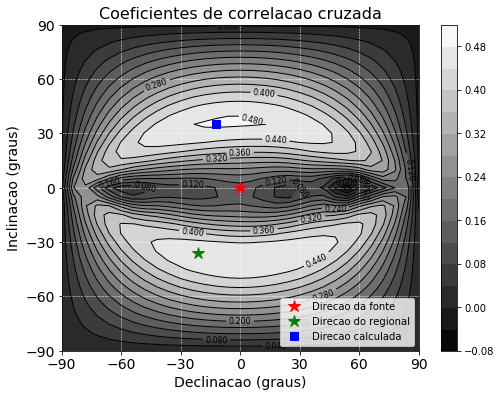

In [21]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig0a = pyplot.contour(D0, I0, res0a, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res0a, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig0a, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax0a, incmax0a, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme00a-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [22]:
# Calculando a reducao ao polo em baixa latitude
rtp0a = rtp_layer(data0a, shape, layer(area, (20, 20), level), (20,20), 
                  0.01, inc, dec, incmax0a, decmax0a)

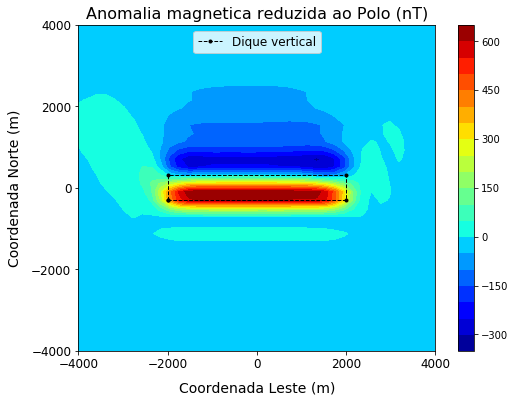

In [23]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp0a,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike0a[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme00a-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 0B - Dique alongado em $N-S$

In [24]:
dike0b = [-2000., 2000., -300., 300., 0., 1000., 1.75]

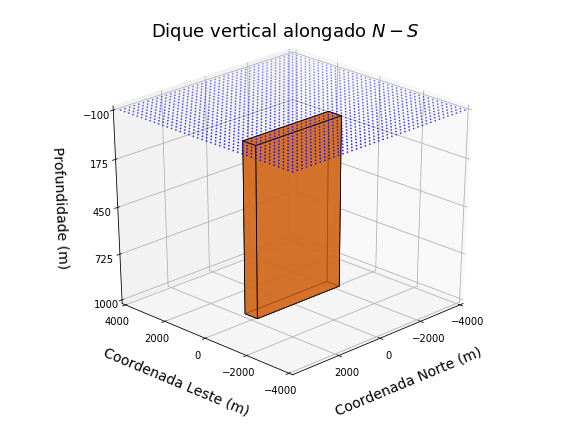

In [25]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical alongado $N-S$', size = 18)

ax.scatter(xo, yo, zo, s = 0.5, c = 'b')
# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike0b[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
pc0b = Poly3DCollection(vertices, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
pc0b.set_facecolor('chocolate')
ax.add_collection3d(pc0b)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(zo.min(), z2, 5))

# Angulo de visualizacao
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme00b-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [26]:
# Calcula a anomalia de campo total
tf0b = prism_tf(xo, yo, zo, dike0b, inc, dec, incs, decs)

In [27]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf0b, 'nT')

Anomalia magnetica:
Minimum:    -395.5643 nT
Maximum:    357.1140 nT
Mean value: -3.5945 nT
Variation:  752.6783 nT


In [28]:
# Adicao de ruido
tf0b = addnoise(tf0b, 5., 0.05)

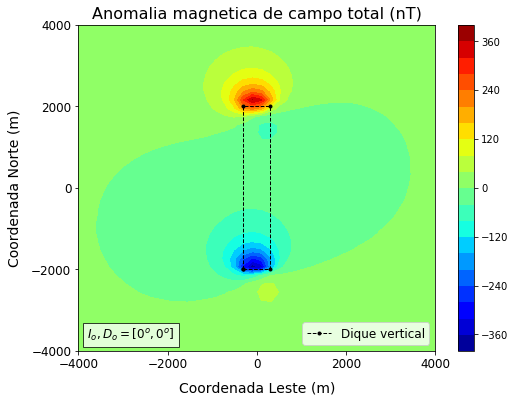

In [29]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf0b.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike0b[0:4], linewidth = 1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'lower right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme00b-anomaly.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [30]:
# Cria a matriz de zeros
res0b = numpy.zeros_like(D0)

In [31]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob0b = tf0b.reshape(shape)

In [32]:
# Aloca todos os valores em uma lista
data0b = [xo, yo, zo, tf0b]

In [33]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data0b, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res0b[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                  zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob0b, inc, dec, i, d)
            res0b[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                  zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 343.524


In [34]:
print 'Maxima correlacao:', res0b.max()
print 'Minima correlacao:', res0b.min()

Maxima correlacao: 0.340313663354
Minima correlacao: -0.0841283429521


In [35]:
imax0b, jmax0b = numpy.where(res0b == res0b.max())
imin0b, jmin0b = numpy.where(res0b == res0b.min())
incmax0b = float(I0[imax0b, jmax0b])
decmax0b = float(D0[imax0b, jmax0b])
incmin0b = float(I0[imin0b, jmin0b])
decmin0b = float(D0[imin0b, jmin0b])
print '(I,D) maximo:', incmax0b, decmax0b
print '(I,D) minimo:', incmin0b, decmin0b

(I,D) maximo: -5.0 0.0
(I,D) minimo: -5.0 24.0


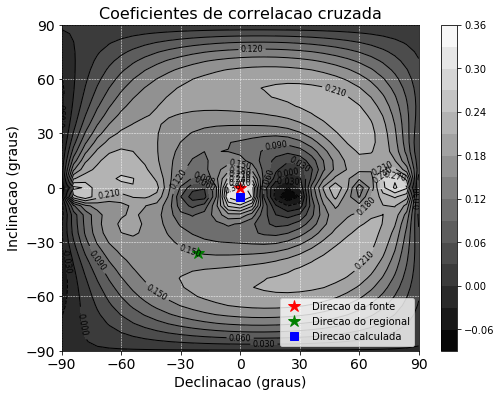

In [36]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig0b = pyplot.contour(D0, I0, res0b, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res0b, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig0b, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax0b, incmax0b, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme00b-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [37]:
# Calculando a reducao ao polo em baixa latitude
rtp0b = rtp_layer(data0b, shape, layer(area, (20, 20), level), (20,20), 
                  0.08, inc, dec, incmax0b, decmax0b)

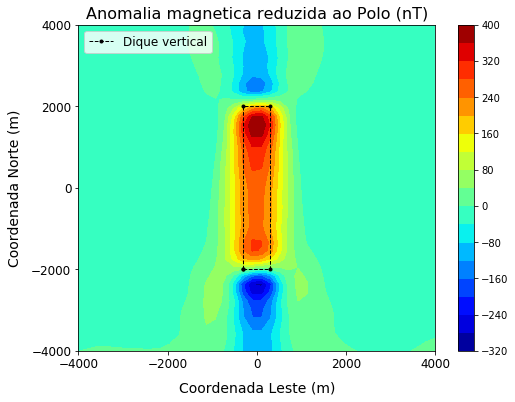

In [38]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp0b,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike0b[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme00b-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 1a - Corpo vertical rotacionado $30^o \, NW-SE$
Cálculo da camada equivalente com as posições originais de observação $[x_o, y_o, z_o]$

In [93]:
dike1 = dike0a#[-700., 800., -500., 400., 200., 1500.]

In [95]:
xr, yr, zr = rotate3D_xyz(xo, yo, zo, 30.)

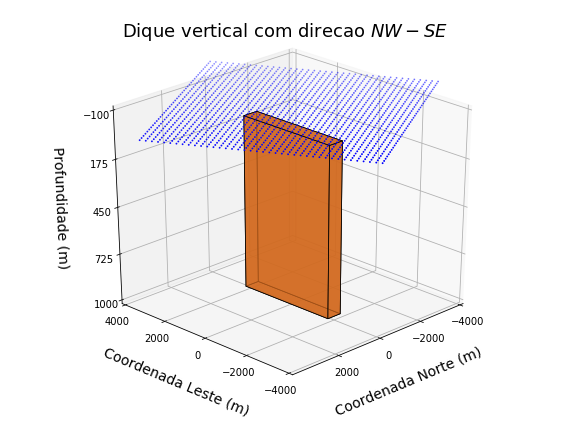

In [299]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical com direcao $NW-SE$', size = 18)

ax.scatter(xr, yr, zr, s = 0.75, c = 'b')
#ax.scatter(xo, yo, zo, s = 0.25, c = 'k')
# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike1[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
pc1 = Poly3DCollection(vertices, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
pc1.set_facecolor('chocolate')
ax.add_collection3d(pc1)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(zo.min(), z2, 5))

# Angulo de visualizacao
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme01a-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [98]:
# Calcula a anomalia de campo total
tf1a = prism_tf(xr, yr, zr, dike1, inc, dec, incs, decs)

In [99]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf1a, 'nT')

Anomalia magnetica:
Minimum:    -660.4945 nT
Maximum:    300.5482 nT
Mean value: -3.2556 nT
Variation:  961.0427 nT


In [100]:
# Adicao de ruido
tf1a = addnoise(tf1a, 5., 0.05)

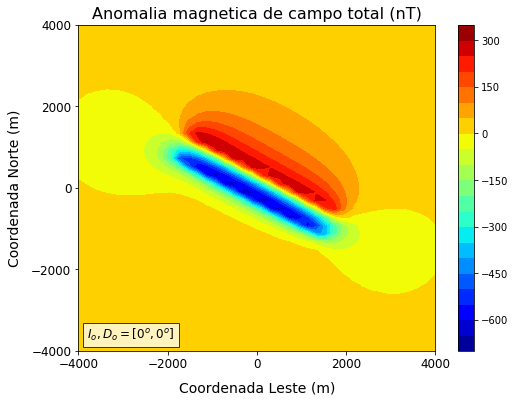

In [123]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf1a.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
#draw_prism(dike[0:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
#pyplot.legend(loc = 'upper center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme01a-anomalia.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [102]:
# Cria a matriz de zeros
res1a = numpy.zeros_like(D0)

In [103]:
# Reshape dos dados
dob1a = tf1a.reshape(shape)

In [104]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [105]:
# Aloca todos os valores em uma lista
data1a = [xo, yo, zo, tf1a]

In [106]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data1a, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res1a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob1a, inc, dec, i, d)
            res1a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 353.492


In [107]:
print 'Maxima correlacao:', res1a.max()
print 'Minima correlacao:', res1a.min()

Maxima correlacao: 0.46432368026
Minima correlacao: -0.287239819124


In [108]:
imax1a, jmax1a = numpy.where(res1a == res1a.max())
imin1a, jmin1a = numpy.where(res1a == res1a.min())
incmax1a = float(I0[imax1a, jmax1a])
decmax1a = float(D0[imax1a, jmax1a])
incmin1a = float(I0[imin1a, jmin1a])
decmin1a = float(D0[imin1a, jmin1a])
print '(I,D) maximo:', incmax1a, decmax1a
print '(I,D) minimo:', incmin1a, decmin1a

(I,D) maximo: -5.0 6.0
(I,D) minimo: -10.0 -90.0


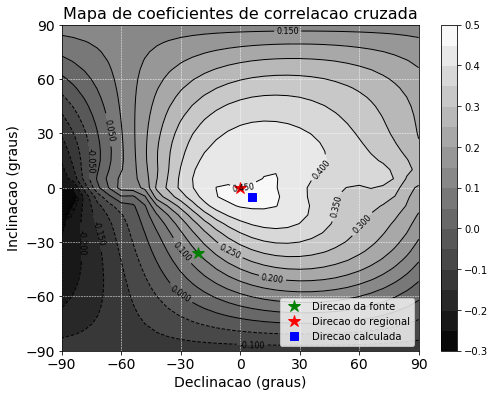

In [130]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig1a = pyplot.contour(D0, I0, res1a, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res1a, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig1a, fontsize = 8)
pyplot.plot(dec, inc, 'g*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(decs, incs, 'r*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax1a, incmax1a, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Mapa de coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme01a-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [131]:
# Calculando a reducao ao polo em baixa latitude
rtp1a = rtp_layer(data1a, shape, layer(area, (20, 20), level), (20,20), 
                 0.01, inc, dec, incmax1a, decmax1a)

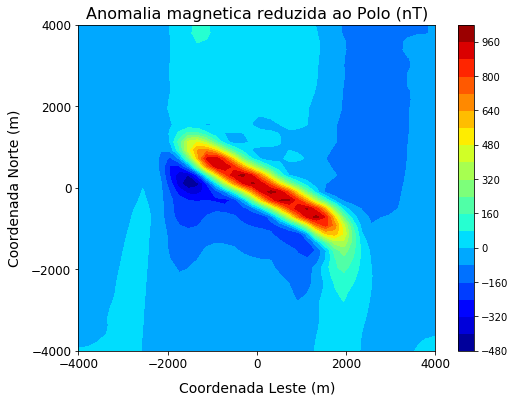

In [132]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp1a,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
#draw_prism(dike[:4], linewidth=1., style = 'k.--' , label = 'Dique vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
#pyplot.legend(loc = 'lower center', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme01a-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 1b - Corpo vertical rotacionado $30^o \, NW-SE$
Cálculo da camada equivalente com as posições rotacionadas de observação $[x^{'}_o, y^{'}_o, z^{'}_o]$

In [112]:
# Copia a anomalia
tf1b = numpy.copy(tf1a)

In [113]:
# Cria a matriz de zeros
res1b = numpy.zeros_like(D0)

In [114]:
# Reshape dos dados
dob1b = tf1b.reshape(shape)

In [115]:
# Reshape dos dados rotacionados
xobsr = xr.reshape(shape)
yobsr = yr.reshape(shape)

In [116]:
# Aloca todos os valores em uma lista
data1b = [xr, yr, zr, tf1b]

In [117]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data1b, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res1b[k1,k2] = cccoef(totalgrad(xobsr, yobsr, rtp), 
                                  zderiv(xobsr, yobsr, rtp))
        else:
            rtp = reduction(xobsr, yobsr, dob1b, inc, dec, i, d)
            res1b[k1,k2] = cccoef(totalgrad(xobsr, yobsr, rtp),
                                  zderiv(xobsr, yobsr, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 348.916


In [118]:
print 'Maxima correlacao:', res1b.max()
print 'Minima correlacao:', res1b.min()

Maxima correlacao: 0.483229105995
Minima correlacao: -0.286192121082


In [119]:
imax1b, jmax1b = numpy.where(res1b == res1b.max())
imin1b, jmin1b = numpy.where(res1b == res1b.min())
incmax1b = float(I0[imax1b, jmax1b])
decmax1b = float(D0[imax1b, jmax1b])
incmin1b = float(I0[imin1b, jmin1b])
decmin1b = float(D0[imin1b, jmin1b])
print '(I,D) maximo:', incmax1b, decmax1b
print '(I,D) minimo:', incmin1b, decmin1b

(I,D) maximo: 35.0 -12.0
(I,D) minimo: 0.0 66.0


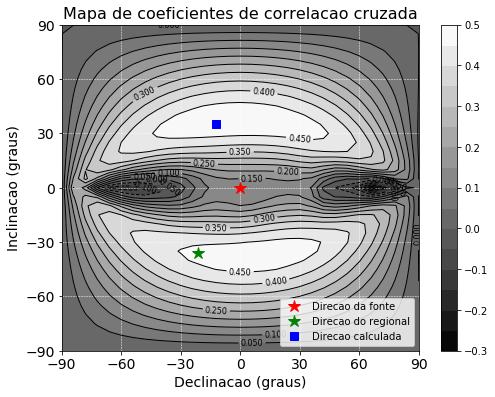

In [133]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig1b = pyplot.contour(D0, I0, res1b, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res1b, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig1b, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax1b, incmax1b, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Mapa de coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme01b-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [138]:
# Calculando a reducao ao polo em baixa latitude
rtp1b = rtp_layer(data1b, shape, layer(area, (20, 20), level), (20,20), 
                 0.01, inc, dec, incmax1b, decmax1b)

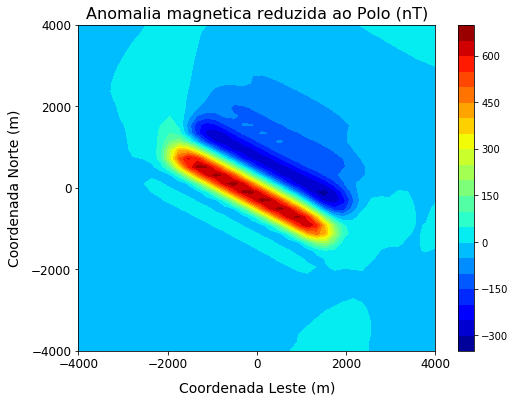

In [139]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp1b,
                20, cmap = pyplot.cm.jet)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.savefig('figs-seminario2018/cosme01b-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 2 - Fonte alongada em $Z$ (Modelo Chaminé)

In [285]:
# Define modelo e direcoes
dike2 = [-500., 500., -500., 500., 1000., 10000., 1.]

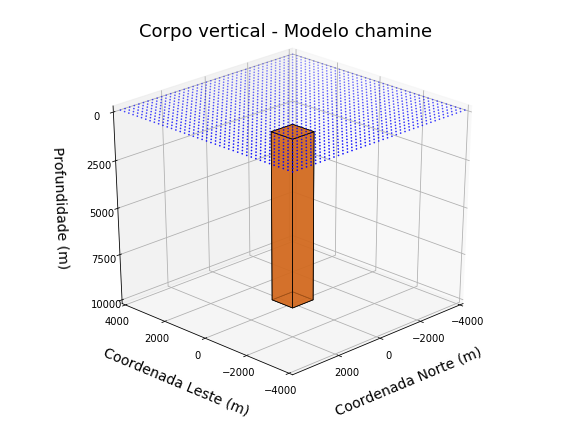

In [286]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Corpo vertical - Modelo chamine', size = 18)

ax.scatter(xo, yo, zo, s = 0.5, c = 'b')
# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike2[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
pc2 = Poly3DCollection(vertices, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
pc2.set_facecolor('chocolate')
ax.add_collection3d(pc2)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 5))
# Angulo de visualizacao
ax.view_init(210, 135)
pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme02-modelo3D.png', dpi = 300, bbox_inches = 'tight', transparence = True)
pyplot.show()

In [287]:
# Calcula a anomalia de campo total
tf2 = prism_tf(xo, yo, zo, dike2, inc, dec, incs, decs)

In [288]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf2, 'nT')

Anomalia magnetica:
Minimum:    -31.7235 nT
Maximum:    13.6052 nT
Mean value: -2.3753 nT
Variation:  45.3287 nT


In [289]:
# Adicao de ruido
tf2 = addnoise(tf2, 5., 0.05)

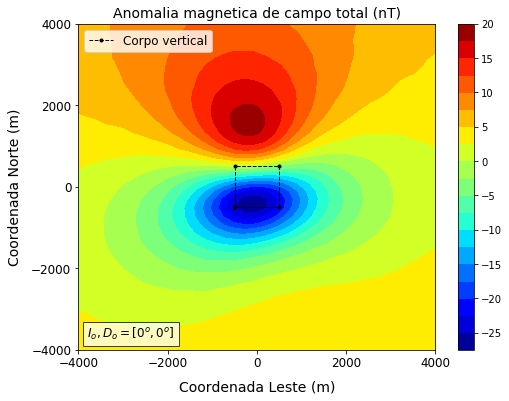

In [290]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf2.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike2[0:4], linewidth=1., style = 'k.--' , label = 'Corpo vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme02-anomalia.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [291]:
# Cria a matriz de zeros
res2 = numpy.zeros_like(D0)

In [292]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob2 = tf2.reshape(shape)

In [293]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 2500.

In [294]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [295]:
# Aloca todos os valores em uma lista
data2 = [xo, yo, zo, tf2]

In [296]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data2, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res2[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob2, inc, dec, i, d)
            res2[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 356.215


In [297]:
print 'Maxima correlacao:', res2.max()
print 'Minima correlacao:', res2.min()

Maxima correlacao: 0.515584061111
Minima correlacao: -0.0976133037035


In [298]:
imax2, jmax2 = numpy.where(res2 == res2.max())
imin2, jmin2 = numpy.where(res2 == res2.min())
incmax2 = float(I0[imax2, jmax2])
decmax2 = float(D0[imax2, jmax2])
incmin2 = float(I0[imin2, jmin2])
decmin2 = float(D0[imin2, jmin2])
print '(I,D) maximo:', incmax2, decmax2
print '(I,D) minimo:', incmin2, decmin2

(I,D) maximo: 0.0 0.0
(I,D) minimo: 0.0 -72.0


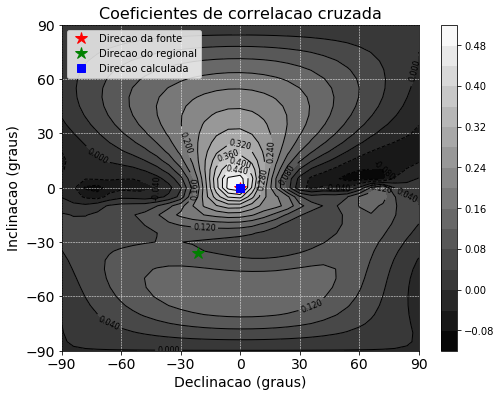

In [302]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig2 = pyplot.contour(D0, I0, res2, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res2, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig2, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax2, incmax2, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme02-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [303]:
# Calculando a reducao ao polo em baixa latitude
rtp2 = rtp_layer(data2, shape, layer(area, (20, 20), level), (20,20), 
                0.01, inc, dec, incmax2, decmax2)

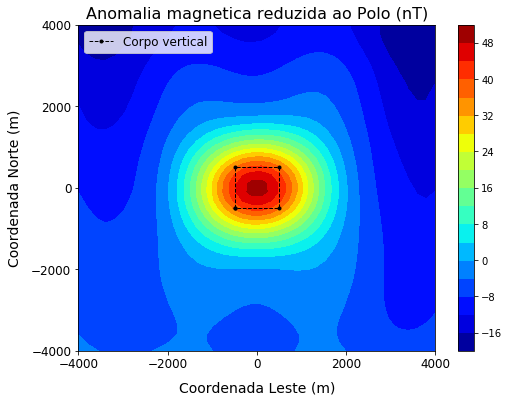

In [304]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp2,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike2[:4], linewidth=1., style = 'k.--' , label = 'Corpo vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme02-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 3 - Dique vertical alongado em $Z$

In [314]:
# Define modelo e direcoes
dike3 = [-2500., 2500., -500., 500., 0., 15000., 1.]

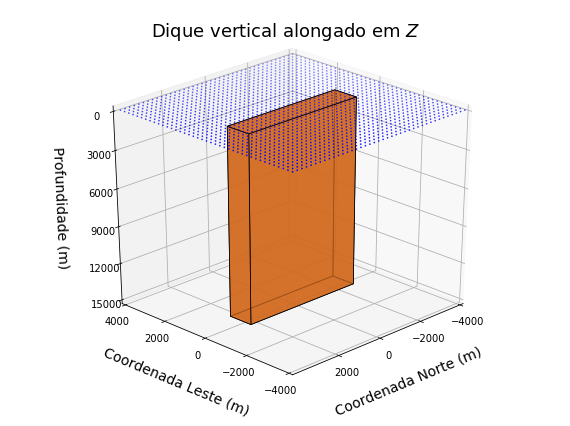

In [1261]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical alongado em $Z$', size = 18)

ax.scatter(xo, yo, zo, s = 0.5, c = 'b')
# Vertices do prisma
# Lista com as arestas do prisma
x1, x2, y1, y2, z1, z2 = dike3[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vertices = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
            [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]
# Plota os lados
pc2 = Poly3DCollection(vertices, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
pc2.set_facecolor('chocolate')
ax.add_collection3d(pc2)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(zo.min(), z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 6))
# Angulo de visualizacao
ax.view_init(210, 135)
pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme03-modelo3D.png', dpi = 300, bbox_inches = 'tight', transparence = True)
pyplot.show()

In [316]:
# Calcula a anomalia de campo total
tf3 = prism_tf(xo, yo, zo, dike3, inc, dec, incs, decs)

In [317]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf3, 'nT')

Anomalia magnetica:
Minimum:    -323.9955 nT
Maximum:    301.7082 nT
Mean value: -17.0046 nT
Variation:  625.7037 nT


In [318]:
# Adicao de ruido
tf3 = addnoise(tf3, 5., 0.05)

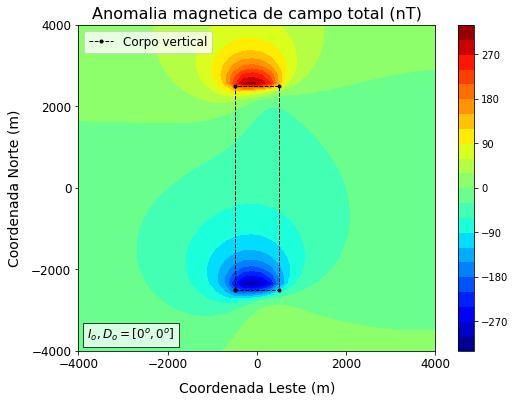

In [319]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf3.reshape(shape), 
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike3[0:4], linewidth=1., style = 'k.--' , label = 'Corpo vertical', xy2ne = True)
pyplot.text(-3800., -3700., '$I_o, D_o = [0^o, 0^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme03-anomalia.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [320]:
# Cria a matriz de zeros
res3 = numpy.zeros_like(D0)

In [321]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob3 = tf3.reshape(shape)

In [322]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 4000.

In [323]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [324]:
# Aloca todos os valores em uma lista
data3 = [xo, yo, zo, tf3]

In [325]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data3, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res3[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob3, inc, dec, i, d)
            res3[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 346.985


In [326]:
print 'Maxima correlacao:', res3.max()
print 'Minima correlacao:', res3.min()

Maxima correlacao: 0.142320902159
Minima correlacao: -0.307184457044


In [327]:
imax3, jmax3 = numpy.where(res3 == res3.max())
imin3, jmin3 = numpy.where(res3 == res3.min())
incmax3 = float(I0[imax3, jmax3])
decmax3 = float(D0[imax3, jmax3])
incmin3 = float(I0[imin3, jmin3])
decmin3 = float(D0[imin3, jmin3])
print '(I,D) maximo:', incmax3, decmax3
print '(I,D) minimo:', incmin3, decmin3

(I,D) maximo: 5.0 -6.0
(I,D) minimo: -10.0 -6.0


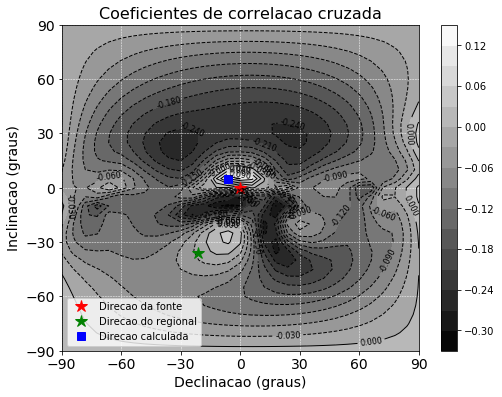

In [329]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig3 = pyplot.contour(D0, I0, res3, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res3, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig3, fontsize = 8)
pyplot.plot(decs, incs, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax3, incmax3, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'lower left', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme03-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [330]:
# Calculando a reducao ao polo em baixa latitude
rtp3 = rtp_layer(data3, shape, layer(area, (20, 20), level), (20,20), 
                0.01, inc, dec, incmax3, decmax3)

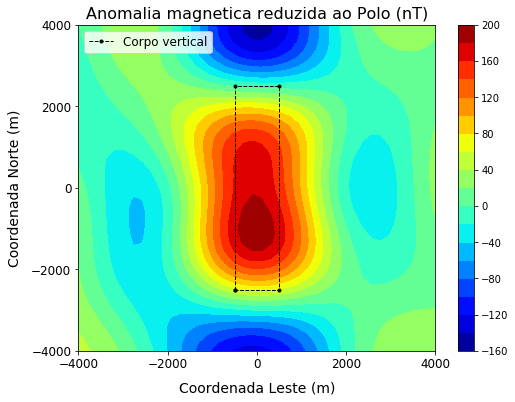

In [331]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp3,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike3[:4], linewidth=1., style = 'k.--' , label = 'Corpo vertical', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme03-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 4A - Rochas encaixante e intrusiva (Direções $N-S$)

In [712]:
batolito = [-1600., 1600., -1300., 1300., 100., 2600., 1.25]
intrusao = [-250., 250., -800., 800., 300., 1200., 2.15]

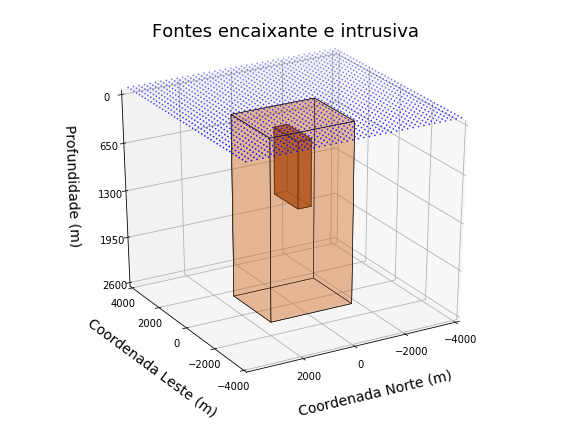

In [1263]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Fontes encaixante e intrusiva', size = 18)

ax.scatter(xo, yo, zo, s = 0.5, c = 'b')

x1a, x2a, y1a, y2a, z1a, z2a = batolito[:6]
x1b, x2b, y1b, y2b, z1b, z2b = intrusao[:6]
v1a = numpy.array([[x1a, y1a, z2a], [x1a, y2a, z2a], [x2a, y2a, z2a], [x2a, y1a, z2a], 
                 [x1a, y1a, z1a], [x1a, y2a, z1a], [x2a, y2a, z1a], [x2a, y1a, z1a]])
v2b = numpy.array([[x1b, y1b, z2b], [x1b, y2b, z2b], [x2b, y2b, z2b], [x2b, y1b, z2b], 
                 [x1b, y1b, z1b], [x1b, y2b, z1b], [x2b, y2b, z1b], [x2b, y1b, z1b]])
vertices1 = [[v1a[0],v1a[1],v1a[2],v1a[3]], [v1a[0],v1a[1],v1a[5],v1a[4]], [v1a[1],v1a[2],v1a[6],v1a[5]],
            [v1a[2],v1a[3],v1a[7],v1a[6]], [v1a[3],v1a[0],v1a[4],v1a[7]], [v1a[4],v1a[5],v1a[6],v1a[7]]]
vertices2 = [[v2b[0],v2b[1],v2b[2],v2b[3]], [v2b[0],v2b[1],v2b[5],v2b[4]], [v2b[1],v2b[2],v2b[6],v2b[5]],
            [v2b[2],v2b[3],v2b[7],v2b[6]], [v2b[3],v2b[0],v2b[4],v2b[7]], [v2b[4],v2b[5],v2b[6],v2b[7]]]

pc4a = Poly3DCollection(vertices1, alpha = 0.25, linewidths=0.5, edgecolors = 'k')
pc4a.set_facecolor('chocolate')
ax.add_collection3d(pc4a)

pc4b = Poly3DCollection(vertices2, alpha = 0.75, linewidths=0.75, edgecolors = 'k')
pc4b.set_facecolor('sienna')
ax.add_collection3d(pc4b)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2a)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2a, 5))

# Angulo de visualizacao
ax.view_init(210, 120)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme04a-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [724]:
inc4a, dec4a = -18., -11.
inc4b, dec4b = 0., 0.

In [725]:
# Calcula a anomalia de campo total
tf4a = prism_tf(xo, yo, zo, batolito, inc, dec, inc4a, dec4a) +\
    prism_tf(xo, yo, zo, intrusao, inc, dec, inc4b, dec4b)

In [726]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf4a, 'nT')

Anomalia magnetica:
Minimum:    -416.9419 nT
Maximum:    477.1580 nT
Mean value: -10.4287 nT
Variation:  894.0999 nT


In [727]:
# Adicao de ruido
tf4a = addnoise(tf4a, 5., 0.05)

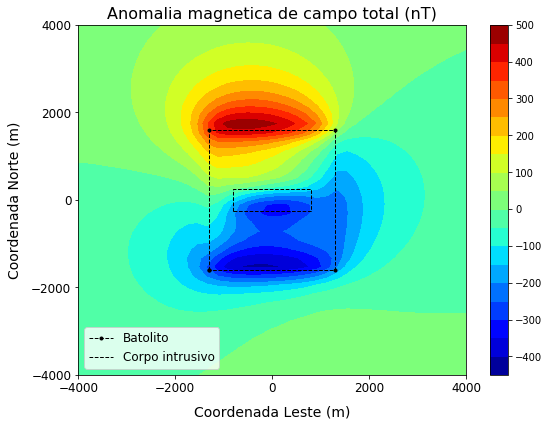

In [728]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf4a.reshape(shape), 
                20, cmap = pyplot.cm.jet)
draw_prism(batolito[0:4], linewidth=1., style = 'k.--' , label = 'Batolito', xy2ne = True)
draw_prism(intrusao[0:4], linewidth=1., style = 'k--' , label = 'Corpo intrusivo', xy2ne = True)
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'lower left', fontsize = 'large')

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme04a-anomalia.png', dpi = 300, bbox_inches = 'tight', 
               facecolor = None, edgecolor = None, transparence = True)
pyplot.show()

In [729]:
# Cria a matriz de zeros
res4a = numpy.zeros_like(D0)

In [730]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob4a = tf4a.reshape(shape)

In [731]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 1000.

In [732]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [733]:
# Aloca todos os valores em uma lista
data4a = [xo, yo, zo, tf4a]

In [734]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data4a, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res4a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob4a, inc, dec, i, d)
            res4a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 348.474


In [735]:
print 'Maxima correlacao:', res4a.max()
print 'Minima correlacao:', res4a.min()

Maxima correlacao: 0.591305443417
Minima correlacao: -0.292089282772


In [736]:
imax4a, jmax4a = numpy.where(res4a == res4a.max())
imin4a, jmin4a = numpy.where(res4a == res4a.min())
incmax4a = float(I0[imax4a, jmax4a])
decmax4a = float(D0[imax4a, jmax4a])
incmin4a = float(I0[imin4a, jmin4a])
decmin4a = float(D0[imin4a, jmin4a])
print '(I,D) maximo:', incmax4a, decmax4a
print '(I,D) minimo:', incmin4a, decmin4a

(I,D) maximo: -20.0 -18.0
(I,D) minimo: 30.0 -42.0


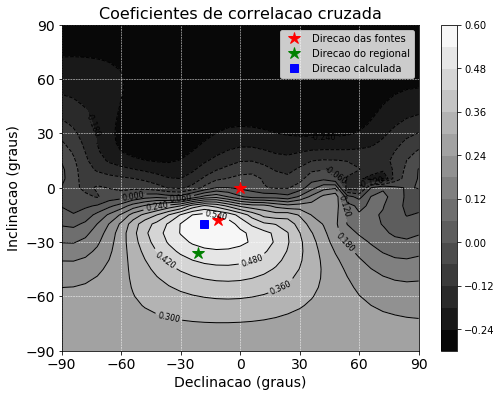

In [739]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig4a = pyplot.contour(D0, I0, res4a, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res4a, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig4a, fontsize = 8)
pyplot.plot((dec4a, dec4b), (inc4a, inc4b), 'r*', label = 'Direcao das fontes', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax4a, incmax4a, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme04a-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [740]:
# Calculando a reducao ao polo em baixa latitude
rtp4a = rtp_layer(data4a, shape, layer(area, (20, 20), level), (20,20), 
                0.01, inc, dec, incmax4a, decmax4a)

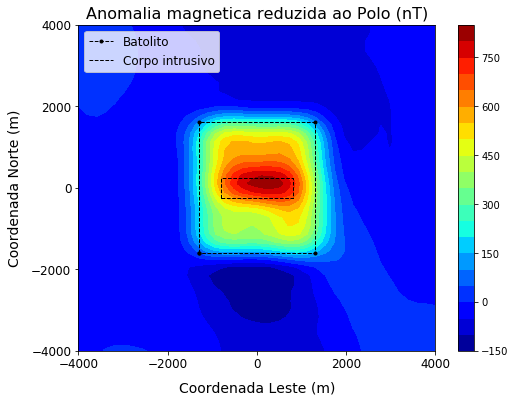

In [741]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp4a,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(batolito[0:4], linewidth=1., style = 'k.--' , label = 'Batolito', xy2ne = True)
draw_prism(intrusao[0:4], linewidth=1., style = 'k--' , label = 'Corpo intrusivo', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme04a-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 4B - Rochas encaixante e intrusiva (Batolito com direcao $NE-SW$)

In [947]:
fonte1 = [-1600., 1600., -1400., 1400., 200., 2500., 1.25]
fonte2 = [-1500., 1500., -200., 200., 300., 1000., 2.15]

In [948]:
inc4a, dec4a = 0., 0.
inc4b, dec4b = inc, dec

In [1001]:
xr1, yr1, zr1 = rotate3D_xyz(xo, yo, zo, -5.)
xr2, yr2, zr2 = rotate3D_xyz(xo, yo, zo, -45.)

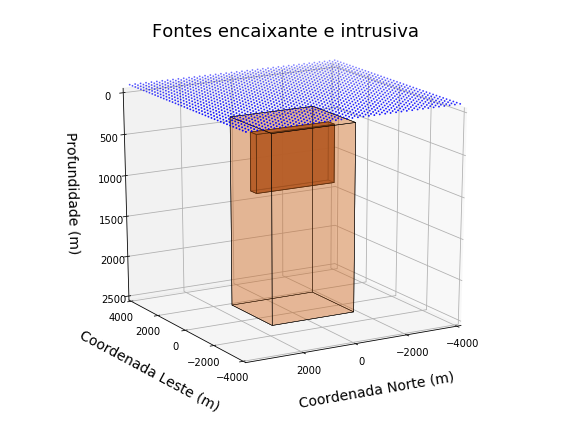

In [1265]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Fontes encaixante e intrusiva', size = 18)

ax.scatter(xo, yo, zo, s = 0.75, c = 'b')
#ax.scatter(xr1, yr1, zr1, s = 0.75, c = 'b')
#ax.scatter(xr2, yr2, zr2, s = 1., c = 'r')

x1a, x2a, y1a, y2a, z1a, z2a = fonte1[:6]
x1b, x2b, y1b, y2b, z1b, z2b = fonte2[:6]
v1a = numpy.array([[x1a, y1a, z2a], [x1a, y2a, z2a], [x2a, y2a, z2a], [x2a, y1a, z2a], 
                 [x1a, y1a, z1a], [x1a, y2a, z1a], [x2a, y2a, z1a], [x2a, y1a, z1a]])
v2b = numpy.array([[x1b, y1b, z2b], [x1b, y2b, z2b], [x2b, y2b, z2b], [x2b, y1b, z2b], 
                 [x1b, y1b, z1b], [x1b, y2b, z1b], [x2b, y2b, z1b], [x2b, y1b, z1b]])
vertices1 = [[v1a[0],v1a[1],v1a[2],v1a[3]], [v1a[0],v1a[1],v1a[5],v1a[4]], [v1a[1],v1a[2],v1a[6],v1a[5]],
            [v1a[2],v1a[3],v1a[7],v1a[6]], [v1a[3],v1a[0],v1a[4],v1a[7]], [v1a[4],v1a[5],v1a[6],v1a[7]]]
vertices2 = [[v2b[0],v2b[1],v2b[2],v2b[3]], [v2b[0],v2b[1],v2b[5],v2b[4]], [v2b[1],v2b[2],v2b[6],v2b[5]],
            [v2b[2],v2b[3],v2b[7],v2b[6]], [v2b[3],v2b[0],v2b[4],v2b[7]], [v2b[4],v2b[5],v2b[6],v2b[7]]]

pc4c = Poly3DCollection(vertices1, alpha = 0.25, linewidths=0.5, edgecolors = 'k')
pc4c.set_facecolor('chocolate')
ax.add_collection3d(pc4c)

pc4d = Poly3DCollection(vertices2, alpha = 0.75, linewidths=0.75, edgecolors = 'k')
pc4d.set_facecolor('sienna')
ax.add_collection3d(pc4d)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2a)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2a, 6))

# Angulo de visualizacao
ax.view_init(200, 120)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme04b-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [1014]:
# Calcula a anomalia de campo total
tf4b = prism_tf(xr1, yr1, zr1, fonte1, inc, dec, inc4a, dec4a) +\
        prism_tf(xr2, yr2, zr2, fonte2, inc, dec, inc4b, dec4b)

In [1003]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf4b, 'nT')

Anomalia magnetica:
Minimum:    -362.3174 nT
Maximum:    283.3137 nT
Mean value: -17.4129 nT
Variation:  645.6311 nT


In [1004]:
# Adicao de ruido
tf4b = addnoise(tf4b, 5., 0.05)

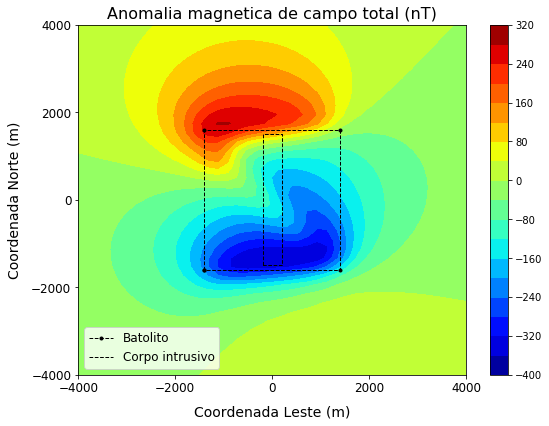

In [1019]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf4b.reshape(shape), 
                20, cmap = pyplot.cm.jet)
draw_prism(fonte1[0:4], linewidth=1., style = 'k.--' , label = 'Batolito', xy2ne = True)
draw_prism(fonte2[0:4], linewidth=1., style = 'k--' , label = 'Corpo intrusivo', xy2ne = True)
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'lower left', fontsize = 'large')

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme04b-anomalia.png', dpi = 300, bbox_inches = 'tight', 
               facecolor = None, edgecolor = None, transparence = True)
pyplot.show()

In [1020]:
# Cria a matriz de zeros
res4b = numpy.zeros_like(D0)

In [1021]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob4b = tf4b.reshape(shape)

In [1022]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 1000.

In [1023]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [1024]:
# Aloca todos os valores em uma lista
data4b = [xo, yo, zo, tf4b]

In [1025]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data4b, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res4b[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob4b, inc, dec, i, d)
            res4b[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 361.018


In [1026]:
print 'Maxima correlacao:', res4b.max()
print 'Minima correlacao:', res4b.min()

Maxima correlacao: 0.507012345166
Minima correlacao: -0.229758974084


In [1027]:
imax4b, jmax4b = numpy.where(res4b == res4b.max())
imin4b, jmin4b = numpy.where(res4b == res4b.min())
incmax4b = float(I0[imax4b, jmax4b])
decmax4b = float(D0[imax4b, jmax4b])
incmin4b = float(I0[imin4b, jmin4b])
decmin4b = float(D0[imin4b, jmin4b])
print '(I,D) maximo:', incmax4b, decmax4b
print '(I,D) minimo:', incmin4b, decmin4b

(I,D) maximo: -10.0 -18.0
(I,D) minimo: 0.0 60.0


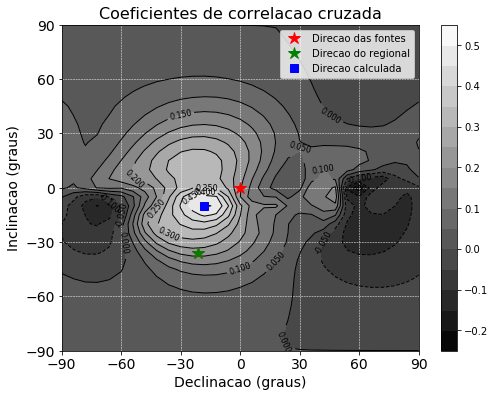

In [1029]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig4b = pyplot.contour(D0, I0, res4b, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res4b, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig4b, fontsize = 8)
pyplot.plot((dec4a, dec4b), (inc4a, inc4b), 'r*', label = 'Direcao das fontes', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax4b, incmax4b, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme04b-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [1030]:
# Calculando a reducao ao polo em baixa latitude
rtp4b = rtp_layer(data4b, shape, layer(area, (20, 20), level), (20,20), 
                0.01, inc, dec, incmax4b, decmax4b)

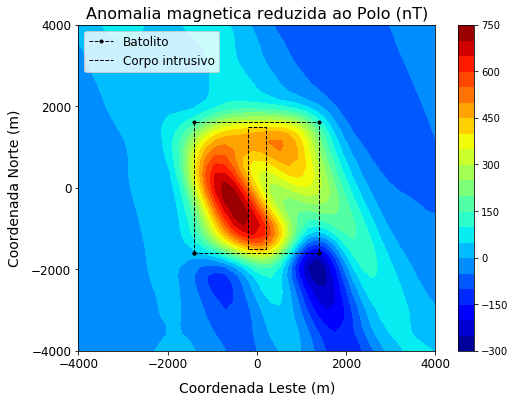

In [1031]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp4b,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(fonte1[0:4], linewidth=1., style = 'k.--' , label = 'Batolito', xy2ne = True)
draw_prism(fonte2[0:4], linewidth=1., style = 'k--' , label = 'Corpo intrusivo', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme04b-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 5 - Corpo com mergulho $(30^o$ $N-S)$

In [1093]:
# Define modelo e direcoes
source1 = [1000., 1500., -1400., 1400., 0., 200., 1.8]
source2 = [500., 1000., -1600., 1600., 200., 500., 1.8]
source3 = [0., 500., -1800., 1800., 500., 900., 1.8]
source4 = [-500., 0., -2000., 2000., 900., 1400., 1.8]
source5 = [-1000., -500., -2200., 2200., 1400., 2000., 1.8]
source6 = [-1500., -1000., -2400., 2400., 2000., 2700., 1.8]

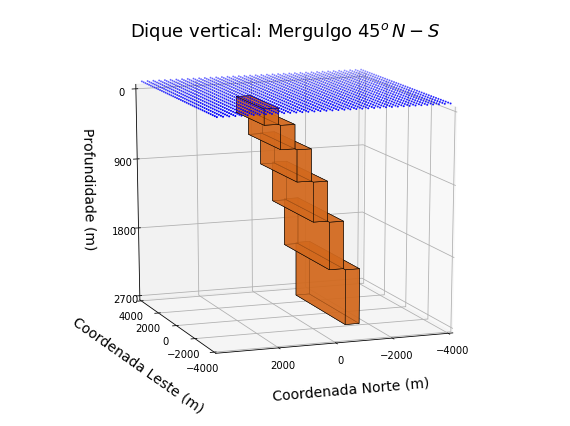

In [1275]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Dique vertical: Mergulgo $45^o \, N-S$', size = 18)

ax.scatter(xo, yo, zo, s = 1., c = 'b')
# Lista com as arestas do prisma
x1a, x2a, y1a, y2a, z1a, z2a = source1[:6]
x1b, x2b, y1b, y2b, z1b, z2b = source2[:6]
x1c, x2c, y1c, y2c, z1c, z2c = source3[:6]
x1d, x2d, y1d, y2d, z1d, z2d = source4[:6]
x1e, x2e, y1e, y2e, z1e, z2e = source5[:6]
x1f, x2f, y1f, y2f, z1f, z2f = source6[:6]
v1a = numpy.array([[x1a, y1a, z2a], [x1a, y2a, z2a], [x2a, y2a, z2a], [x2a, y1a, z2a], 
                 [x1a, y1a, z1a], [x1a, y2a, z1a], [x2a, y2a, z1a], [x2a, y1a, z1a]])
v2b = numpy.array([[x1b, y1b, z2b], [x1b, y2b, z2b], [x2b, y2b, z2b], [x2b, y1b, z2b], 
                 [x1b, y1b, z1b], [x1b, y2b, z1b], [x2b, y2b, z1b], [x2b, y1b, z1b]])
v3a = numpy.array([[x1c, y1c, z2c], [x1c, y2c, z2c], [x2c, y2c, z2c], [x2c, y1c, z2c], 
                 [x1c, y1c, z1c], [x1c, y2c, z1c], [x2c, y2c, z1c], [x2c, y1c, z1c]])
v4d = numpy.array([[x1d, y1d, z2d], [x1d, y2d, z2d], [x2d, y2d, z2d], [x2d, y1d, z2d], 
                 [x1d, y1d, z1d], [x1d, y2d, z1d], [x2d, y2d, z1d], [x2d, y1d, z1d]])
v5e = numpy.array([[x1e, y1e, z2e], [x1e, y2e, z2e], [x2e, y2e, z2e], [x2e, y1e, z2e], 
                 [x1e, y1e, z1e], [x1e, y2e, z1e], [x2e, y2e, z1e], [x2e, y1e, z1e]])
v6f = numpy.array([[x1f, y1f, z2f], [x1f, y2f, z2f], [x2f, y2f, z2f], [x2f, y1f, z2f], 
                 [x1f, y1f, z1f], [x1f, y2f, z1f], [x2f, y2f, z1f], [x2f, y1f, z1f]])
vertices1 = [[v1a[0],v1a[1],v1a[2],v1a[3]], [v1a[0],v1a[1],v1a[5],v1a[4]], [v1a[1],v1a[2],v1a[6],v1a[5]],
            [v1a[2],v1a[3],v1a[7],v1a[6]], [v1a[3],v1a[0],v1a[4],v1a[7]], [v1a[4],v1a[5],v1a[6],v1a[7]]]
vertices2 = [[v2b[0],v2b[1],v2b[2],v2b[3]], [v2b[0],v2b[1],v2b[5],v2b[4]], [v2b[1],v2b[2],v2b[6],v2b[5]],
            [v2b[2],v2b[3],v2b[7],v2b[6]], [v2b[3],v2b[0],v2b[4],v2b[7]], [v2b[4],v2b[5],v2b[6],v2b[7]]]
vertices3 = [[v3a[0],v3a[1],v3a[2],v3a[3]], [v3a[0],v3a[1],v3a[5],v3a[4]], [v3a[1],v3a[2],v3a[6],v3a[5]],
            [v3a[2],v3a[3],v3a[7],v3a[6]], [v3a[3],v3a[0],v3a[4],v3a[7]], [v3a[4],v3a[5],v3a[6],v3a[7]]]
vertices4 = [[v4d[0],v4d[1],v4d[2],v4d[3]], [v4d[0],v4d[1],v4d[5],v4d[4]], [v4d[1],v4d[2],v4d[6],v4d[5]],
            [v4d[2],v4d[3],v4d[7],v4d[6]], [v4d[3],v4d[0],v4d[4],v4d[7]], [v4d[4],v4d[5],v4d[6],v4d[7]]]
vertices5 = [[v5e[0],v5e[1],v5e[2],v5e[3]], [v5e[0],v5e[1],v5e[5],v5e[4]], [v5e[1],v5e[2],v5e[6],v5e[5]],
            [v5e[2],v5e[3],v5e[7],v5e[6]], [v5e[3],v5e[0],v5e[4],v5e[7]], [v5e[4],v5e[5],v5e[6],v5e[7]]]
vertices6 = [[v6f[0],v6f[1],v6f[2],v6f[3]], [v6f[0],v6f[1],v6f[5],v6f[4]], [v6f[1],v6f[2],v6f[6],v6f[5]],
            [v6f[2],v6f[3],v6f[7],v6f[6]], [v6f[3],v6f[0],v6f[4],v6f[7]], [v6f[4],v6f[5],v6f[6],v6f[7]]]
# Plota os lados
pc5a = Poly3DCollection(vertices1, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5a.set_facecolor('chocolate')
ax.add_collection3d(pc5a)

pc5b = Poly3DCollection(vertices2, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5b.set_facecolor('chocolate')
ax.add_collection3d(pc5b)

pc5c = Poly3DCollection(vertices3, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5c.set_facecolor('chocolate')
ax.add_collection3d(pc5c)

pc5d = Poly3DCollection(vertices4, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5d.set_facecolor('chocolate')
ax.add_collection3d(pc5d)

pc5e = Poly3DCollection(vertices5, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5e.set_facecolor('chocolate')
ax.add_collection3d(pc5e)

pc5f = Poly3DCollection(vertices6, alpha = 0.75, linewidths = 0.5, edgecolors = 'k')
pc5f.set_facecolor('chocolate')
ax.add_collection3d(pc5f)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2f)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2f, 4))

# Angulo de visualizacao
ax.view_init(195, 110)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme05-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [1116]:
inc5, dec5 = -5., 5.

In [1117]:
# Calcula a anomalia de campo total
tf5 = prism_tf(xo, yo, zo, source1, inc, dec, inc5, dec5) +\
    prism_tf(xo, yo, zo, source2, inc, dec, inc5, dec5) +\
    prism_tf(xo, yo, zo, source3, inc, dec, inc5, dec5) +\
    prism_tf(xo, yo, zo, source4, inc, dec, inc5, dec5) +\
    prism_tf(xo, yo, zo, source5, inc, dec, inc5, dec5) +\
    prism_tf(xo, yo, zo,source6, inc, dec, inc5, dec5)

In [1118]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf5, 'nT')

Anomalia magnetica:
Minimum:    -185.6291 nT
Maximum:    336.4107 nT
Mean value: -4.1943 nT
Variation:  522.0398 nT


In [1119]:
# Adicao de ruido
tf5 = addnoise(tf5, 5., 0.1)

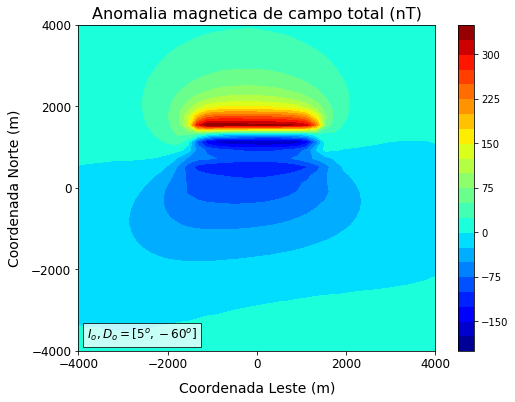

In [1120]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf5.reshape(shape), 
                20, cmap = pyplot.cm.jet)
pyplot.text(-3800., -3700., '$I_o, D_o = [5^o, -60^o]$', 
            fontsize = 12.,bbox=dict(facecolor='white', edgecolor='k', alpha = 0.75))
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
#pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme05-anomalia.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [1121]:
# Cria a matriz de zeros
res5 = numpy.zeros_like(D0)

In [1122]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob5 = tf5.reshape(shape)

In [1123]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 1000.

In [1124]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [1125]:
# Aloca todos os valores em uma lista
data5 = [xo, yo, zo, tf5]

In [1126]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data5, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res5[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob5, inc, dec, i, d)
            res5[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 355.303


In [1127]:
print 'Maxima correlacao:', res5.max()
print 'Minima correlacao:', res5.min()

Maxima correlacao: 0.617103878665
Minima correlacao: -0.501036263772


In [1128]:
imax5, jmax5 = numpy.where(res5 == res5.max())
imin5, jmin5 = numpy.where(res5 == res5.min())
incmax5 = float(I0[imax5, jmax5])
decmax5 = float(D0[imax5, jmax5])
incmin5 = float(I0[imin5, jmin5])
decmin5 = float(D0[imin5, jmin5])
print '(I,D) maximo:', incmax5, decmax5
print '(I,D) minimo:', incmin5, decmin5

(I,D) maximo: -35.0 -6.0
(I,D) minimo: 55.0 -24.0


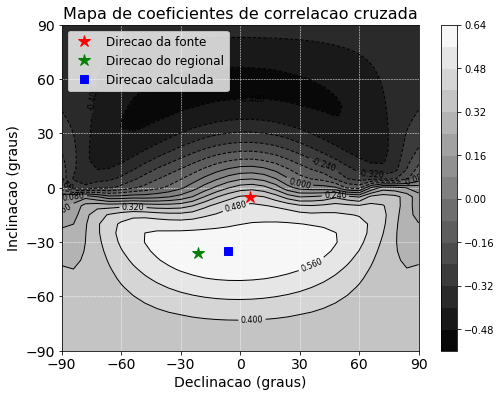

In [1129]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig5 = pyplot.contour(D0, I0, res5, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res5, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig5, fontsize = 8)
pyplot.plot(dec5, inc5, 'r*', label = 'Direcao da fonte', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax5, incmax5, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Mapa de coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper left', fontsize = 'large')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme05-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [1130]:
# Calculando a reducao ao polo em baixa latitude
rtp5 = rtp_layer(data5, shape, layer(area, (20, 20), level), (20, 20), 
                0.01, inc, dec, incmax5, decmax5)

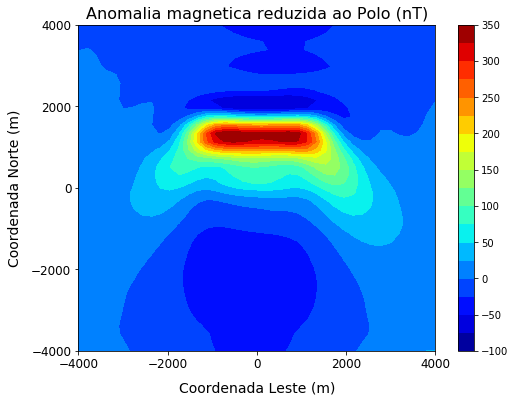

In [1131]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp5,
                20, cmap = pyplot.cm.jet)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
#pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme05-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 6A - Diques verticais cruzados sem inclinações

In [1245]:
# Define os modelos
dike6a = [-1800., 1800., -300., 300., 100., 2100., 1.65]
dike6b = [-300., 300., -1800., 1800., 200., 2200., 1.65]

In [1246]:
inc6, dec6 = 0., 0.

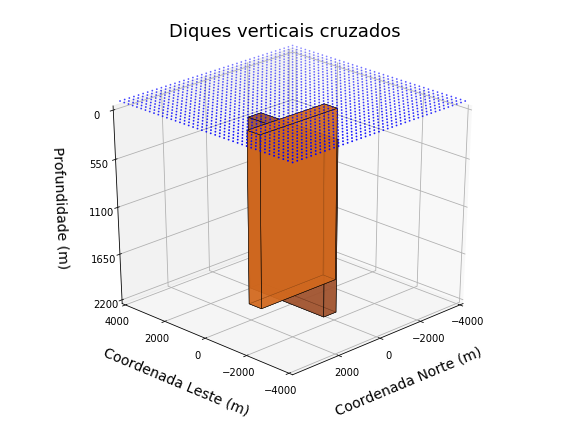

In [1284]:
# Plota a figura do modelo sintetico
figure = pyplot.figure(figsize=(8,6))
ax = figure.gca(projection = '3d')
ax.set_title('Diques verticais cruzados', size = 18)

ax.scatter(xo, yo, zo, s = 0.75, c = 'b')
#ax.scatter(xr1, yr1, zr1, s = 0.75, c = 'b')
#ax.scatter(xr2, yr2, zr2, s = 1., c = 'r')

x1a, x2a, y1a, y2a, z1a, z2a = dike6a[:6]
x1b, x2b, y1b, y2b, z1b, z2b = dike6b[:6]
v1a = numpy.array([[x1a, y1a, z2a], [x1a, y2a, z2a], [x2a, y2a, z2a], [x2a, y1a, z2a], 
                 [x1a, y1a, z1a], [x1a, y2a, z1a], [x2a, y2a, z1a], [x2a, y1a, z1a]])
v2b = numpy.array([[x1b, y1b, z2b], [x1b, y2b, z2b], [x2b, y2b, z2b], [x2b, y1b, z2b], 
                 [x1b, y1b, z1b], [x1b, y2b, z1b], [x2b, y2b, z1b], [x2b, y1b, z1b]])
vertices1 = [[v1a[0],v1a[1],v1a[2],v1a[3]], [v1a[0],v1a[1],v1a[5],v1a[4]], [v1a[1],v1a[2],v1a[6],v1a[5]],
            [v1a[2],v1a[3],v1a[7],v1a[6]], [v1a[3],v1a[0],v1a[4],v1a[7]], [v1a[4],v1a[5],v1a[6],v1a[7]]]
vertices2 = [[v2b[0],v2b[1],v2b[2],v2b[3]], [v2b[0],v2b[1],v2b[5],v2b[4]], [v2b[1],v2b[2],v2b[6],v2b[5]],
            [v2b[2],v2b[3],v2b[7],v2b[6]], [v2b[3],v2b[0],v2b[4],v2b[7]], [v2b[4],v2b[5],v2b[6],v2b[7]]]

pc6a = Poly3DCollection(vertices1, alpha = 0.75, linewidths=0.5, edgecolors = 'k')
pc6a.set_facecolor('chocolate')
ax.add_collection3d(pc6a)

pc6b = Poly3DCollection(vertices2, alpha = 0.75, linewidths=0.5, edgecolors = 'k')
pc6b.set_facecolor('sienna')
ax.add_collection3d(pc6b)

# Escala da projecao
x_scale = 1.
y_scale = 1.
z_scale = 1.25
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

# Labels
ax.set_xlabel('Coordenada Norte (m)', size = 14, labelpad = 20)
ax.set_ylabel('Coordenada Leste (m)', size = 14, labelpad = 20)
ax.set_zlabel('Profundidade (m)', size = 14, labelpad = 20)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2b)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2b, 5))

# Angulo de visualizacao
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme06a-modelo3D.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [1248]:
# Calcula a anomalia de campo total
tf6a = prism_tf(xo, yo, zo, dike6a, inc, dec, inc6, dec6) +\
        prism_tf(xo, yo, zo, dike6b, inc, dec, inc6, dec6)

In [1249]:
# Analise do dado
print 'Anomalia magnetica:'
_ = analysis(tf6a, 'nT')

Anomalia magnetica:
Minimum:    -398.6365 nT
Maximum:    299.9823 nT
Mean value: -9.9760 nT
Variation:  698.6187 nT


In [1250]:
# Adicao de ruido
tf6a = addnoise(tf6a, 5., 0.05)

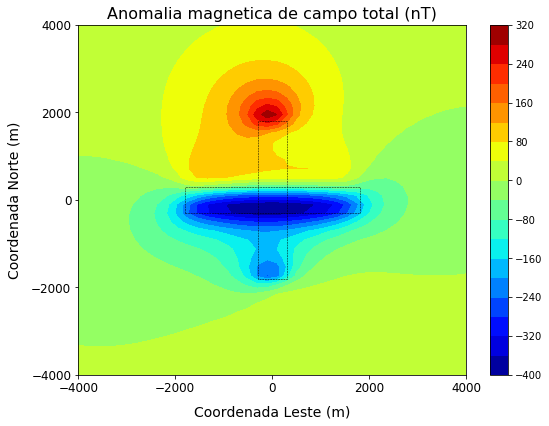

In [1295]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf6a.reshape(shape), 
                20, cmap = pyplot.cm.jet)
draw_prism(dike6a[0:4], linewidth=0.5, style = 'k--' , label = 'Diques', xy2ne = True)
draw_prism(dike6b[0:4], linewidth=0.5, style = 'k--', xy2ne = True)
pyplot.title('Anomalia magnetica de campo total (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
#pyplot.legend(loc = 'lower left', fontsize = 'large')

pyplot.tight_layout(True)
pyplot.savefig('figs-seminario2018/cosme06a-anomalia.png', dpi = 300, bbox_inches = 'tight', 
               facecolor = None, edgecolor = None, transparence = True)
pyplot.show()

In [1252]:
# Cria a matriz de zeros
res6a = numpy.zeros_like(D0)

In [1253]:
# Reshape dos dados
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dob6a = tf6a.reshape(shape)

In [1254]:
# Construindo uma camada equivalente
area_layer = area
shape_layer = (12, 12)
level = 800.

In [1255]:
# Calcula a camada equivalente
eqlayer = layer(area_layer, shape_layer, level)

In [1256]:
# Aloca todos os valores em uma lista
data6a = [xo, yo, zo, tf6a]

In [1257]:
# Calcula a correlação cruzada completa
initial = time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = rtp_layer(data6a, shape, eqlayer, shape_layer, 0.01, inc, dec, i, d)
            res6a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp), 
                                 zderiv(xobs, yobs, rtp))
        else:
            rtp = reduction(xobs, yobs, dob6a, inc, dec, i, d)
            res6a[k1,k2] = cccoef(totalgrad(xobs, yobs, rtp),
                                 zderiv(xobs, yobs, rtp))
final = time()
print 'Tempo de calculo (sec): %.3f' % (final-initial)

Tempo de calculo (sec): 368.618


In [1285]:
print 'Maxima correlacao:', res6a.max()
print 'Minima correlacao:', res6a.min()

Maxima correlacao: 0.468970777189
Minima correlacao: -0.14144890324


In [1286]:
imax6a, jmax6a = numpy.where(res6a == res6a.max())
imin6a, jmin6a = numpy.where(res6a == res6a.min())
incmax6a = float(I0[imax6a, jmax6a])
decmax6a = float(D0[imax6a, jmax6a])
incmin6a = float(I0[imin6a, jmin6a])
decmin6a = float(D0[imin6a, jmin6a])
print '(I,D) maximo:', incmax6a, decmax6a
print '(I,D) minimo:', incmin6a, decmin6a

(I,D) maximo: -5.0 0.0
(I,D) minimo: 0.0 54.0


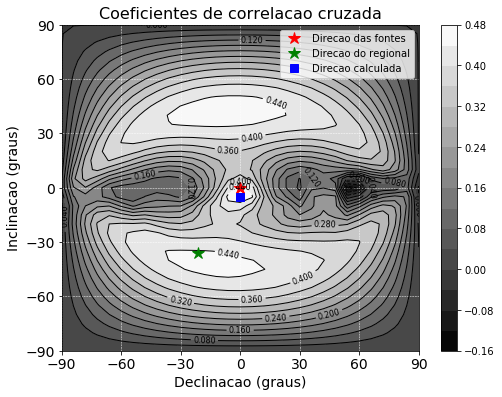

In [1287]:
# Plota o mapa de correlacao
pyplot.figure(figsize=(8, 6))
fig6a = pyplot.contour(D0, I0, res6a, 15, colors = 'k', linestyle = 'solid', linewidths = 1)
pyplot.contourf(D0, I0, res6a, 15, cmap = pyplot.cm.gray)
pyplot.clabel(fig6a, fontsize = 8)
pyplot.plot((dec6, dec6), (inc6, inc6), 'r*', label = 'Direcao das fontes', markersize = 12)
pyplot.plot(dec, inc, 'g*', label = 'Direcao do regional', markersize = 12)
pyplot.plot(decmax6a, incmax6a, 'bs', label = 'Direcao calculada', markersize = 8)
pyplot.title('Coeficientes de correlacao cruzada', fontsize = 16)
pyplot.xlabel('Declinacao (graus)', fontsize = 14)
pyplot.ylabel('Inclinacao (graus)', fontsize = 14)
pyplot.xticks(numpy.linspace(D0.min(), D0.max(), 7), fontsize = 14)
pyplot.yticks(numpy.linspace(I0.min(), I0.max(), 7), fontsize = 14)
pyplot.legend(loc = 'upper right', fontsize = 'medium')
pyplot.colorbar()
pyplot.grid(color = 'w', linestyle='--', linewidth = .5)
pyplot.savefig('figs-seminario2018/cosme06a-correlation.png', dpi = 300, bbox_inches = 'tight', transparece = True)
pyplot.show()

In [1288]:
# Calculando a reducao ao polo em baixa latitude
rtp6a = rtp_layer(data6a, shape, layer(area, (20, 20), level), (20,20), 
                0.01, inc, dec, incmax6a, decmax6a)

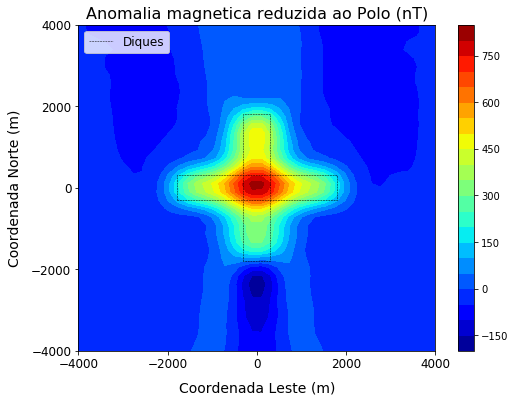

In [1294]:
# Plota o resultado
pyplot.figure(figsize=(8, 6))
pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp6a,
                20, cmap = pyplot.cm.jet)
# Contorno do modelo
draw_prism(dike6a[0:4], linewidth=0.5, style = 'k--' , label = 'Diques', xy2ne = True)
draw_prism(dike6b[0:4], linewidth=0.5, style = 'k--', xy2ne = True)
pyplot.title('Anomalia magnetica reduzida ao Polo (nT)', fontsize = 16)
pyplot.xlabel('Coordenada Leste (m)', fontsize = 14, labelpad = 10)
pyplot.ylabel('Coordenada Norte (m)', fontsize = 14, labelpad = 10)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 12)
pyplot.colorbar(orientation = 'vertical')
pyplot.legend(loc = 'upper left', fontsize = 'large')

pyplot.savefig('figs-seminario2018/cosme06a-rtp-data.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

### Teste 6B - Diques verticais cruzados com inclinações

* Dique 1 rotacionado $-45^o$; 
* Dique 2 rotacionado $45^o$; 